In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\Musa\Desktop\Iris_dataset2.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,149.0,3.051007,0.433499,2.0,2.8,3.0,3.3,4.4
PetalLength,149.0,3.774497,1.759651,1.0,1.6,4.4,5.1,6.9
PetalWidth,149.0,1.205369,0.761292,0.1,0.3,1.3,1.8,2.5


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLength    149 non-null    float64
 3   PetalWidth     149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
x = df.drop('Species',axis = 1).values
y = df["Species"].values
x1 = np.mean(x)
x1

np.float64(3.469798657718121)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
scaler = StandardScaler()
x_train_ = scaler.fit_transform(x_train)
x_test_ = scaler.transform(x_test)
x_test_.shape

(30, 4)

In [6]:
x_train.shape

(119, 4)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
pred_lr = lr.predict(x_test)
pred_lr_tr = lr.predict(x_train)

In [50]:
acc_train_lr = accuracy_score(y_train,pred_lr_tr)
acc_train_lr

0.9663865546218487

In [51]:
acc_test_lr = accuracy_score(y_test,pred_lr)
acc_test_lr

1.0

In [52]:
print(classification_report(pred_lr,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [53]:
print(classification_report(pred_lr_tr,y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.97      0.95        38
 Iris-virginica       0.97      0.93      0.95        41

       accuracy                           0.97       119
      macro avg       0.97      0.97      0.97       119
   weighted avg       0.97      0.97      0.97       119



In [79]:
print(confusion_matrix(pred_lr_tr,y_train))

[[40  0  0]
 [ 0 37  1]
 [ 0  3 38]]


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,max_depth = 5, min_samples_split = 10)
rfc.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
pred_rfc = rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)

In [56]:
acc_test_rfc = accuracy_score(y_test,pred_rfc)
'the test of Accuracy_score RandomForest classifier',acc_test_rfc

('the test of Accuracy_score RandomForest classifier', 1.0)

In [57]:
acc_train_rfc = accuracy_score(y_train,pred_rfc_train)
'The train of Accuracy_score',acc_train_rfc

('The train of Accuracy_score', 0.9663865546218487)

In [58]:
print(classification_report(pred_rfc,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [59]:
print(classification_report(pred_rfc_train,y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.97      0.95        38
 Iris-virginica       0.97      0.93      0.95        41

       accuracy                           0.97       119
      macro avg       0.97      0.97      0.97       119
   weighted avg       0.97      0.97      0.97       119



In [60]:
print(confusion_matrix(pred_rfc_train,y_train))

[[40  0  0]
 [ 0 37  1]
 [ 0  3 38]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7,algorithm = 'kd_tree',leaf_size = 28)
knn.fit(x_train,y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [62]:
pred_knn = knn.predict(x_test)
pred_knn_tr = knn.predict(x_train)

In [63]:
acc_test_knn = accuracy_score(y_test,pred_knn)
'Accuracy_score',acc_test_knn

('Accuracy_score', 1.0)

In [64]:
acc_train_knn = accuracy_score(y_train,pred_knn_tr)
'Accuracy_score',acc_train_knn

('Accuracy_score', 0.9663865546218487)

In [65]:
print(classification_report(pred_knn,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [66]:
print(classification_report(pred_knn_tr,y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.97      0.95        38
 Iris-virginica       0.97      0.93      0.95        41

       accuracy                           0.97       119
      macro avg       0.97      0.97      0.97       119
   weighted avg       0.97      0.97      0.97       119



In [77]:
print(confusion_matrix(pred_knn_tr,y_train))

[[40  0  0]
 [ 0 37  1]
 [ 0  3 38]]


In [67]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(random_state = 42)
Dtree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
pred_dt = Dtree.predict(x_test)
pred_dt_train = Dtree.predict(x_train)


In [69]:
acc_test_dt = accuracy_score(y_test,pred_dt)
acc_test_dt

0.9333333333333333

In [70]:
acc_train_dt = accuracy_score(y_train,pred_dt_train)
acc_train_dt

1.0

In [78]:
print(confusion_matrix(pred_dt_train,y_train))

[[40  0  0]
 [ 0 40  0]
 [ 0  0 39]]


In [71]:
print(classification_report(y_test,pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
# acc_test_lr = Logistic regression
# acc_test_dt = Decision Tree classifier
# acc_test_knn = k_nearest neighberhod
# acc_test_rfc = random forest classifier

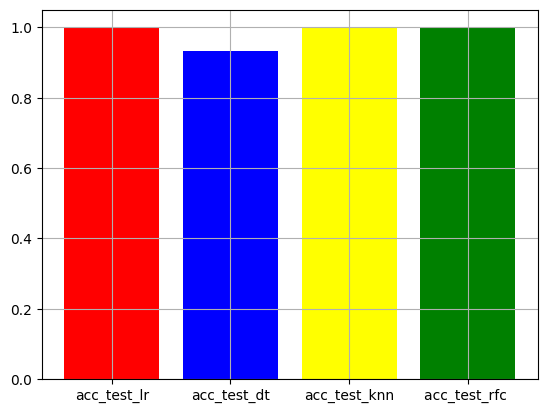

In [74]:
acc_test = [acc_test_lr,acc_test_dt,acc_test_knn,acc_test_rfc ]
acc_test_name = ['acc_test_lr', 'acc_test_dt' ,'acc_test_knn','acc_test_rfc ' ]
acc_test_colors = ['red','blue','yellow','green']
plt.bar(acc_test_name,acc_test, color = acc_test_colors)
plt.grid()
plt.show()

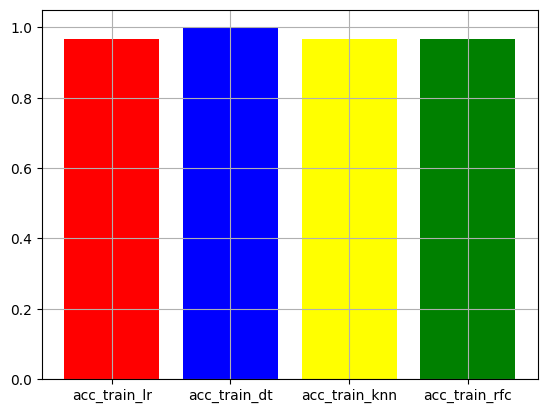

In [75]:
acc_train = [acc_train_lr,acc_train_dt,acc_train_knn,acc_train_rfc]
acc_train_name = ['acc_train_lr', 'acc_train_dt' ,'acc_train_knn','acc_train_rfc' ]
acc_train_colors = ['red','blue','yellow','green']
plt.bar(acc_train_name,acc_train,color = acc_train_colors)
plt.grid()
plt.show()